<h1>Парний t-критерій Стьюдента</h1>

Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

Написати функції:
* для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

Перевірити розбіжність на між групами на даних з п. 1.

Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scipy
import matplotlib.pyplot as plt

random_nums1 = np.random.normal(loc=10, scale=5, size=20)
random_1 = np.round(random_nums1)
random_nums2 = np.random.normal(loc=10, scale=5, size=20)
random_2 = np.round(random_nums2)

df = pd.DataFrame({
    'Programming': random_1,
    'English': random_2
    })

df

,Programming,English
0,8.0,7.0
1,9.0,20.0
2,3.0,18.0
3,18.0,9.0
4,13.0,9.0
5,8.0,12.0
6,13.0,9.0
7,5.0,7.0
8,18.0,12.0
9,16.0,10.0


[Text(0.5, 0, 'Scores')]

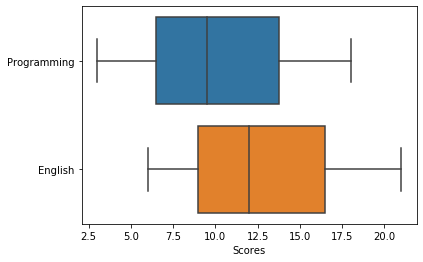

In [46]:
sns.boxplot(data=df, orient='h').set(xlabel='Scores')

In [65]:
def Pirson(x, y):
    n=len(x)
    sum_all = 0
    for i in range(len(x)):
        sum_all += x[i] * y[i] 
    
    sum_x=sum(x)
    sum_y=sum(y)
    sum_sum_x = sum_x**2
    sum_sum_y = sum_y**2
    sum_sq_x = 0
    sum_sq_y = 0
    for i in range(len(x)):
        sum_sq_x += x[i] **2
        sum_sq_y += y[i] **2
        
    r=((n*sum_all) - (sum_x*sum_y))/math.sqrt(((n*sum_sq_x) - sum_sum_x) * ((n*sum_sq_y) - sum_sum_y))
    print("Коефіцієнт кореляції Пірсона: ", r)
   
    df = n-2
    print("Число ступенів свободи: ", df)
    
    import xlrd, xlwt
    rb = xlrd.open_workbook('Pirson_table.xlsx')
    sheet = rb.sheet_by_index(0)
    r_tabl = sheet.row_values(df)[1] 
    print("Критичне значення: ",r_tabl)
    
    if(r_tabl < r):
        result = "significant"
    else:
        result = "not significant"
    print("Результат оцінки значимості зв'язку:", result)

In [66]:
Pirson(random_1, random_2)

Коефіцієнт кореляції Пірсона:  -0.2932674475294131
Число ступенів свободи:  18
Критичне значення:  0.4438
Результат оцінки значимості зв'язку: not significant


In [67]:
def Student(x, y):
    d = []
    n = len(x)
    for i in range(n):
        d.append(x[i] - y[i])
    Mid = sum(d)/n 
    qd = np.std(d, ddof = 1)
   
    t = (Mid/qd)*math.sqrt(n)
    print('')
    print("Значення критерію Стюдента: ", t)
    
    df = n - 1
    print("Значення ступенів свободи: ", df)
    
    import xlrd, xlwt
    rb = xlrd.open_workbook('Student_table.xlsx')
    sheet = rb.sheet_by_index(0)
    t_t = sheet.row_values(df)[1] 
    print("Критичне значення: ",t_t)
    
    if(t_t < t):
        result = "significant" 
    else:
        result = "not significant" 
    print("Результат оцінки значимості зв'язку:", result)

In [68]:
Student(random_1, random_2)


Значення критерію Стюдента:  -1.4102160065856557
Значення ступенів свободи:  19
Критичне значення:  2.093
Результат оцінки значимості зв'язку: not significant


1. За коефіцієнтом кореляції Пірсона робимо висновок, що статистично значимої залежності між групами не існує, так як коефіцієнт кореляції Пірсона дорівнює -0.2932674475294131.

2. Під час аналізу відмінності між групами за допомогою критерія t-Стьюдента, було прийнято нульову гіпотезу про рівність середніх, оскільки значення критерію менше за критичне.